In [1]:
# Import modules.
import math
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

# Plot aesthetics.
%matplotlib inline
sns.set_style('white')

# Suppress harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p=10

# Create random normally distribted data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome realted to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

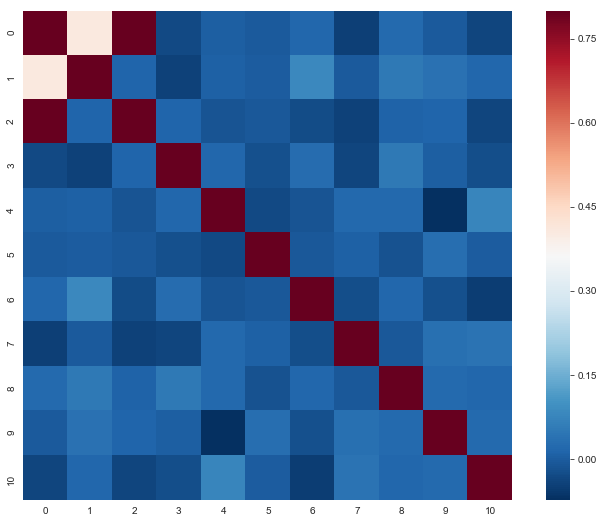

In [5]:
# Check out correlations. First column in the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdBu_r')
plt.show()

R-squared regression: 0.8468545032957789
R-squared PLSR: 0.8468543608357028


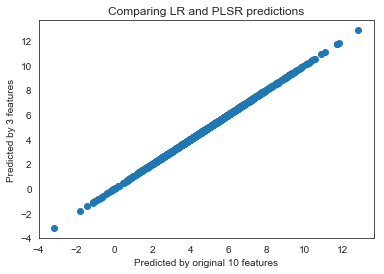

In [15]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls3 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls3.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls3.predict(X)
print('R-squared PLSR:', pls3.score(X, y))

# Compare the predictions of the top 2 models.
plt.scatter(Y_pred, Y_PLS_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [17]:
# 4 components
pls4 = PLSRegression(n_components=4)
pls4.fit(X, y)
Y_PLS_pred = pls4.predict(X)
print('R-squared PLSR (4 features):', pls4.score(X, y))

# 5 components
pls5 = PLSRegression(n_components=5)
pls5.fit(X, y)
Y_PLS_pred = pls5.predict(X)
print('R-squared PLSR (5 features):', pls5.score(X, y))

# 6 components
pls6 = PLSRegression(n_components=6)
pls6.fit(X, y)
Y_PLS_pred = pls6.predict(X)
print('R-squared PLSR (6 features):', pls6.score(X, y))

# 7 components
pls7 = PLSRegression(n_components=7)
pls7.fit(X, y)
Y_PLS_pred = pls7.predict(X)
print('R-squared PLSR (7 features):', pls7.score(X, y))

R-squared PLSR (4 features): 0.8468545024544503
R-squared PLSR (5 features): 0.8468545032936284
R-squared PLSR (6 features): 0.8468545032957613
R-squared PLSR (7 features): 0.8468545032957789
